# Seattle Library Data: **Checkout Analysis**

**Aufgabe**: <br/>

*Seattle Library Datenanalyse: Die Library von Seattle veröffentlicht vorbildlich einige ihrer gesammelten Daten. Wir haben hier ein kleines Beispiel zusammengestellt, in dem Teile der Daten heruntergeladen werden, in einen Pandas-DataFrame geladen werden und dann analysiert werden. Darin könnt ihr noch ein paar weitere Funktionalitäten von pandas entdecken.*

*Erstellt ein neues Jupyter Notebook und überlegt euch für die Aufgabe drei Fragen, die ihr mittels einer Analyse mit Pandas auf die Daten anwenden könnt. Visualisiert eure Analysen durch tabellarische Form oder ein Histogramm.*

**Datasets**:

* [Checkouts by Title](https://dev.socrata.com/foundry/data.seattle.gov/tmmm-ytt6)
* [Library Collection Inventory](https://data.seattle.gov/Community/Library-Collection-Inventory/6vkj-f5xf)

**API-dokumenation**:
* Paging through Data https://dev.socrata.com/docs/queries/
* Queries using SODA https://dev.socrata.com/docs/paging.html

In [71]:
%matplotlib inline

import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline

from matplotlib.ticker import ScalarFormatter
from io import StringIO
from pathlib import Path

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# **Checkout Data Analysis 2012-2022**

In [72]:
def load_data(start_year=2012, end_year=2013, start_month=2, end_month=4, limit=1000,
              filename='temp_data.csv'):
    """
    Helper function to download csv datasets for a range of years
    and months. By using the argument `limit` limit the count of 
    data entries per year.

    Parameters:

    - `start_year`: Set the start year (e.g. `2012`)
    - `end_year`: Set the end year (e.g. `2013`)
    - `start_month`: Set the starting month (e.g. `2` == February)
    - `end_month`: Set the ending month (e.g. `3` == March)
    - `limit`: Limits the amount of data entries retrieved for each month
    - `filename`: Set a filename for your csv

    Example:
    
    Get all checkout data for March and April between 2012 and 2021. Limit 
    the retrieved data for each month to 1000 and save the file as `checkouts.csv` 

    `load_data(start_year=2012, end_year=2021, start_month=3, end_month=4, limit=1000, filename='2012-21_seattlelib_checkouts.csv')`
    """
    # Create pd.DataFrame to store csv data
    df = pd.DataFrame()

    # Iterate over years and months and load csv data
    for year in range(start_year, (end_year + 1)):
        for month in range(start_month, (end_month + 1)):
            url = f"https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear={year}&checkoutmonth={month}&$limit={limit}"
            print(f'Loading csv data for {month}/{year} from: {url}')
            csv_content = urllib.request.urlopen(url).read().decode('utf-8')
            temp_df = pd.read_csv(StringIO(csv_content))
            df = pd.concat([df, temp_df], ignore_index=True)

    # Save DF to disk as csv
    df.to_csv(filename, index=False)
    print(f'Saved csv as {filename}')

### About the dataset
- Get library checkout data from the years **2012 to 2022**
- Limit data entries for each year to **20,000** and set the month to **March** to make each year comparable
- Concat each year to a `pd.DataFrame`
- Save the complete DataFrame as `csv`

In [76]:
# Define csv filename
csv_filename = '2012-22_seattlelib_checkouts.csv'

In [4]:
load_data(start_year=2012, end_year=2022, start_month=3, end_month=3, 
          limit=20000, filename=csv_filename)

Loading csv data for 3/2012 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2012&checkoutmonth=3&$limit=20000
Loading csv data for 3/2013 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2013&checkoutmonth=3&$limit=20000
Loading csv data for 3/2014 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2014&checkoutmonth=3&$limit=20000
Loading csv data for 3/2015 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2015&checkoutmonth=3&$limit=20000
Loading csv data for 3/2016 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2016&checkoutmonth=3&$limit=20000
Loading csv data for 3/2017 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2017&checkoutmonth=3&$limit=20000
Loading csv data for 3/2018 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2018&checkoutmonth=3&$limit=20000
Loading csv data for 3/2019 from: https://data.s

## **Data Cleaning**

In [77]:
# Read csv
checkout_df = pd.read_csv(Path(csv_filename))

In [78]:
checkout_df.head()

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,isbn,creator,subjects,publisher,publicationyear
0,Digital,Freegal,SONG,2012,3,1,Jagadananda Karaka,NaN,E. Gayatri,NaN,NaN,NaN
1,Physical,Horizon,BOOK,2012,3,2,Puddles,NaN,NaN,Rain and rainfall Fiction,NaN,NaN
2,Digital,Freegal,SONG,2012,3,1,The Call Up,NaN,The Clash,NaN,NaN,NaN
3,Physical,Horizon,BOOK,2012,3,1,empty copper sea,NaN,NaN,Large type books,NaN,NaN
4,Digital,Freegal,SONG,2012,3,1,Any Day Now,NaN,Elvis Presley,NaN,NaN,NaN


In [79]:
checkout_df.tail(3)

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,isbn,creator,subjects,publisher,publicationyear
219997,Digital,OverDrive,AUDIOBOOK,2022,3,3,The Spanish Bride (unabridged),NaN,Georgette Heyer,"Classic Literature, Fiction","Naxos of America, Inc.",2018
219998,Digital,OverDrive,AUDIOBOOK,2022,3,3,Death and the Lit Chick: St. Just Mystery Seri...,NaN,G. M. Malliet,"Fiction, Mystery","Dreamscape Media, LLC",2013
219999,Digital,OverDrive,EBOOK,2022,3,1,A Collapse of Horses,NaN,Brian Evenson,"Fiction, Literature, Short Stories",Lightning Source Inc,2016


Check if monthly distribution of data entries is correct, i.e. **only** month of March is present

In [80]:
checkout_df['checkoutmonth'].value_counts() # *checkoutmonth* == 3 == March

checkoutmonth
3    220000
Name: count, dtype: int64

In [81]:
checkout_df.shape

(220000, 12)

In [82]:
checkout_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220000 entries, 0 to 219999
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   usageclass       220000 non-null  object 
 1   checkouttype     220000 non-null  object 
 2   materialtype     220000 non-null  object 
 3   checkoutyear     220000 non-null  int64  
 4   checkoutmonth    220000 non-null  int64  
 5   checkouts        220000 non-null  int64  
 6   title            220000 non-null  object 
 7   isbn             0 non-null       float64
 8   creator          182822 non-null  object 
 9   subjects         210009 non-null  object 
 10  publisher        201018 non-null  object 
 11  publicationyear  198410 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 20.1+ MB


In [83]:
# Remove isbn column as it contains no values
print(checkout_df[checkout_df['isbn'].notna()])
del checkout_df['isbn']

Empty DataFrame
Columns: [usageclass, checkouttype, materialtype, checkoutyear, checkoutmonth, checkouts, title, isbn, creator, subjects, publisher, publicationyear]
Index: []


In [84]:
# Convert columns to appropriate dtypes
def improve_memory_usage(df):
    df['usageclass'] = df['usageclass'].astype('category')
    df['checkouttype'] = df['checkouttype'].astype('category')
    df['checkoutmonth'] = df['checkoutmonth'].astype('int8')
    df['checkouts'] = df['checkouts'].astype('int16')
    df['checkoutyear'] = df['checkoutyear'].astype('int16')
    return df

In [85]:
# Check for num of unique values
print(checkout_df['usageclass'].unique())
print(checkout_df['checkouttype'].unique())

checkout_df = improve_memory_usage(checkout_df)

['Digital' 'Physical']
['Freegal' 'Horizon' 'OverDrive' 'Hoopla' 'Zinio']


In [86]:
checkout_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220000 entries, 0 to 219999
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   usageclass       220000 non-null  category
 1   checkouttype     220000 non-null  category
 2   materialtype     220000 non-null  object  
 3   checkoutyear     220000 non-null  int16   
 4   checkoutmonth    220000 non-null  int8    
 5   checkouts        220000 non-null  int16   
 6   title            220000 non-null  object  
 7   creator          182822 non-null  object  
 8   subjects         210009 non-null  object  
 9   publisher        201018 non-null  object  
 10  publicationyear  198410 non-null  object  
dtypes: category(2), int16(2), int8(1), object(6)
memory usage: 11.5+ MB


## **Analysis**

#### Frequency distribution by `materialtype` (books, ebooks, audiobooks etc.)

In [87]:
# All available materialtypes in dataset
checkout_df['materialtype'].unique()

array(['SONG', 'BOOK', 'SOUNDDISC', 'VIDEODISC', 'VIDEO', 'MIXED', 'CR',
       'EBOOK', 'AUDIOBOOK', 'MUSIC', 'ER', 'ER, VIDEODISC', 'VISUAL',
       'VIDEOCASS', 'ER, SOUNDDISC', 'SOUNDDISC, VIDEODISC', 'SOUNDCASS',
       'MAP', 'SOUNDREC', 'ATLAS', 'MUSICSNDREC', 'KIT', 'MOVIE',
       'MAGAZINE', 'TELEVISION', 'FLASHCARD, SOUNDDISC',
       'SLIDE, SOUNDCASS, VIDEOCASS', 'REGPRINT', 'LARGEPRINT', 'COMIC',
       'VIDEOREC', 'SOUNDDISC, SOUNDREC', 'VIDEOCART', 'MICROFORM',
       'GLOBE', 'REGPRINT, SOUNDDISC', 'SOUNDDISC, VIDEOCASS',
       'UNSPECIFIED'], dtype=object)

In [89]:
# Get top 10 materialtypes, but split combined values first (e.g. "ER, SOUNDDISC")
material_types = (
    checkout_df['materialtype']
    .str.split(', ')
    .explode()
    .value_counts()[:10]
    )
material_types

materialtype
BOOK          102427
EBOOK          47909
AUDIOBOOK      19767
SOUNDDISC      19048
VIDEODISC      18897
SONG            7885
MUSIC           1536
MOVIE            745
TELEVISION       515
VIDEO            262
Name: count, dtype: int64

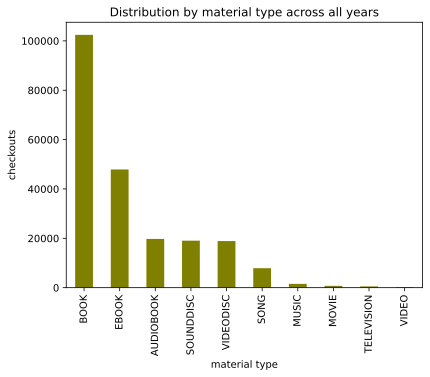

In [90]:
# Plot top 10 materialtypes
material_types.plot.bar(color='olive', 
                        xlabel='material type', 
                        ylabel='checkouts',
                        title='Distribution by material type across all years');

#### Trend for top 5 `materialtypes`

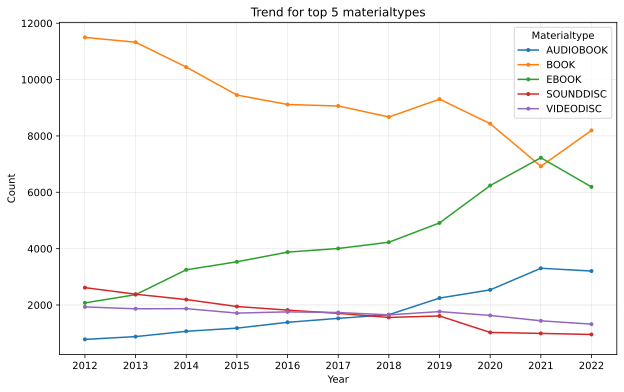

In [91]:
# Get labels of top 5 materialtypes
top5_mtypes = list(checkout_df['materialtype'].value_counts().index[:5])

# Group data
mtypes_df = checkout_df[checkout_df['materialtype'].isin(top5_mtypes)]
mtypes_plot_data = (
    mtypes_df
    .groupby('checkoutyear')['materialtype']
    .value_counts()
    .unstack()
    )

# Increase plot size for better display
plt.figure(figsize=(10, 6))
plt.grid(True, which='both', linestyle='-', linewidth=0.2)

# Plot data
plt.plot(mtypes_plot_data, marker='.', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Trend for top 5 materialtypes')
plt.xticks(mtypes_plot_data.index)
plt.legend(title='Materialtype', labels=mtypes_plot_data.columns)

plt.show()

#### Amount of `checkouts` across all years

In [92]:
# Summed checkouts across all years
checkout_df['checkouts'].sum()

750031

In [93]:
# Sort DF by checkouts
checkout_df.sort_values(by='checkouts', ascending=False).head()

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
167332,Digital,OverDrive,EBOOK,2020,3,1270,There There: A Novel,Tommy Orange,"Fiction, Literature","Random House, Inc.",2018
136303,Physical,Horizon,MIXED,2018,3,1195,In Building Device Checkout,NaN,"Laptop computers, iPad Computer, Tablet computers","Lenovo,",[2013-].
147649,Physical,Horizon,BOOK,2019,3,509,Nine perfect strangers / Liane Moriarty.,"Moriarty, Liane","Novelists Fiction, Health resorts Fiction, Str...","Flatiron Books,",2018.
141859,Physical,Horizon,BOOK,2019,3,507,The library book / Susan Orlean.,"Orlean, Susan",Los Angeles Public Library Central Library Fir...,"Simon & Schuster,",2018.
112615,Digital,Zinio,MAGAZINE,2017,3,457,The Economist,NaN,NaN,NaN,NaN


#### Overall `checkout` distribution across all years

In [94]:
# Checkout stats for all unique titles (==count) in dataset
checkout_df.groupby('title')['checkouts'].sum().describe()

count    188025.000000
mean          3.988996
std          10.666813
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max        1270.000000
Name: checkouts, dtype: float64

Plot the distribution of summed checkouts for all unique titles, i.e. how many titles were checked out once vs. a hundred times across all years

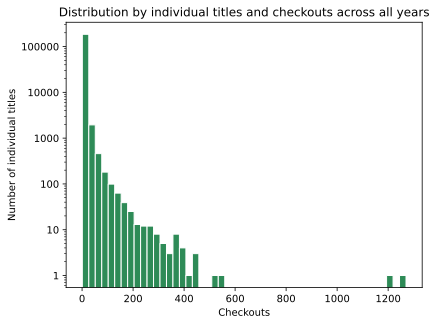

In [95]:
# Plot unique title distribution by summed checkouts across all years
checkout_data = (
    checkout_df
    .groupby('title')['checkouts']
    .sum()
    .sort_values(ascending=False)
    )

plt.hist(checkout_data, bins=50, log=True, edgecolor='white', color='seagreen')
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.xlabel('Checkouts')
plt.ylabel('Number of individual titles')
plt.title('Distribution by individual titles and checkouts across all years')

plt.show()

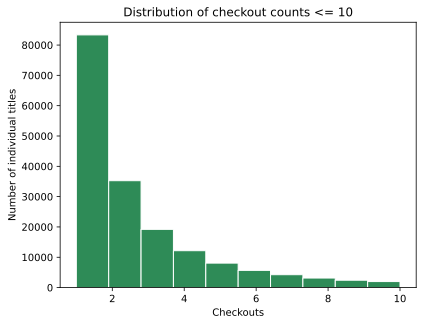

In [33]:
# Plot unique title distribution by summed checkouts across all years 
# for all unique titles that where checked out <= 10 times
checkouts_ser = checkout_df.groupby('title')['checkouts'].sum().sort_values(ascending=False)
checkout_bin10 = checkouts_ser[(checkouts_ser >= 1) & (checkouts_ser <= 10)]

plt.hist(checkout_bin10, bins=10, edgecolor='white', color='seagreen')
plt.xlabel('Checkouts')
plt.ylabel('Number of individual titles')
plt.title('Distribution of checkout counts <= 10')

plt.show()

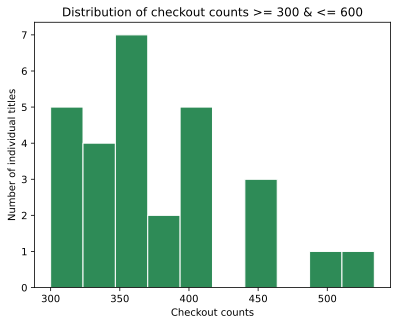

In [34]:
# Plot unique title distribution by summed checkouts across all years 
# for all unique titles that where checked out between 300 and 600 times
checkouts_ser = checkout_df.groupby('title')['checkouts'].sum().sort_values(ascending=False)
checkout_bin300 = checkouts_ser[(checkouts_ser >= 300) & (checkouts_ser <= 600)]

plt.hist(checkout_bin300, bins=10, edgecolor='white', color='seagreen')
plt.xlabel('Checkout counts')
plt.ylabel('Number of individual titles')
plt.title('Distribution of checkout counts >= 300 & <= 600')

plt.show()

In [35]:
# Print number of unique titles for different checkout groups
bins = checkout_df.groupby('title')['checkouts'].sum().sort_values(ascending=False)

bin5 = bins[(bins >= 1) & (bins <= 5)]
bin10 = bins[(bins >= 6) & (bins <= 10)]
bin25 = bins[(bins >= 11) & (bins <= 25)]
bin50 = bins[(bins >= 26) & (bins <= 50)]
bin100 = bins[(bins >= 51) & (bins <= 100)]
bin100plus = bins[(bins >= 101)]

print(f'Num of unique titles with checkouts between 1-5:    {len(bin5)} >> {(len(bin5)/len(bins)*100):.2f} % of all titles')
print(f'Num of unique titles with checkouts between 6-10:   {len(bin10)}  >> {(len(bin10)/len(bins)*100):.2f} % of all titles')
print(f'Num of unique titles with checkouts between 11-25:  {len(bin25)}   >> {(len(bin25)/len(bins)*100):.2f} % of all titles')
print(f'Num of unique titles with checkouts between 26-50:  {len(bin50)}   >> {(len(bin50)/len(bins)*100):.2f} % of all titles')
print(f'Num of unique titles with checkouts between 51-100: {len(bin100)}    >> {(len(bin100)/len(bins)*100):.2f} % of all titles')
print(f'Num of unique titles with checkouts above 100:      {len(bin100plus)}    >> {(len(bin100plus)/len(bins)*100):.2f} % of all titles')
print(f'Num of unique titles in dataset:                    {len(bins)}')


Num of unique titles with checkouts between 1-5:    158035 >> 84.05 % of all titles
Num of unique titles with checkouts between 6-10:   17449  >> 9.28 % of all titles
Num of unique titles with checkouts between 11-25:  9448   >> 5.02 % of all titles
Num of unique titles with checkouts between 26-50:  2127   >> 1.13 % of all titles
Num of unique titles with checkouts between 51-100: 655    >> 0.35 % of all titles
Num of unique titles with checkouts above 100:      311    >> 0.17 % of all titles
Num of unique titles in dataset:                    188025


#### Top 10 `titles` with most checkouts across all years

In [36]:
# First 10 of subset
(
    checkout_df
    .sort_values(by='checkouts', ascending=False)
    [['materialtype', 'checkoutyear', 'title', 'creator', 'checkouts']]
    .head(10)
)

,materialtype,checkoutyear,title,creator,checkouts
167332,EBOOK,2020,There There: A Novel,Tommy Orange,1270
136303,MIXED,2018,In Building Device Checkout,NaN,1195
147649,BOOK,2019,Nine perfect strangers / Liane Moriarty.,"Moriarty, Liane",509
141859,BOOK,2019,The library book / Susan Orlean.,"Orlean, Susan",507
112615,MAGAZINE,2017,The Economist,NaN,457
68413,VIDEODISC,2015,Boyhood [videorecording] / IFC Films ; IFC Pro...,NaN,450
107708,MAGAZINE,2017,The New Yorker,NaN,399
102932,VIDEODISC,2017,Manchester by the Sea / Lionsgate ; Amazon Stu...,NaN,398
27119,VIDEODISC,2013,Moonrise kingdom [videorecording] / Focus Feat...,NaN,397
66272,VIDEODISC,2015,Guardians of the galaxy [videorecording] / Mar...,NaN,375


#### `Books` Top 10 across all years

In [37]:
# First 10 of subset
(
    checkout_df
    .query('materialtype == "BOOK"')
    .sort_values(by='checkouts', ascending=False)
    [['materialtype', 'checkoutyear', 'title', 'creator', 'checkouts']]
    .head(10)
)

,materialtype,checkoutyear,title,creator,checkouts
147649,BOOK,2019,Nine perfect strangers / Liane Moriarty.,"Moriarty, Liane",509
141859,BOOK,2019,The library book / Susan Orlean.,"Orlean, Susan",507
149499,BOOK,2019,An anonymous girl / Greer Hendricks and Sarah ...,"Hendricks, Greer",369
157586,BOOK,2019,The truths we hold : an American journey / Kam...,"Harris, Kamala D.",367
135044,BOOK,2018,Ready player one / Ernest Cline.,"Cline, Ernest",367
207091,BOOK,2022,The sentence : a novel / Louise Erdrich.,"Erdrich, Louise",363
159237,BOOK,2019,Golden State / Ben H. Winters.,"Winters, Ben H.",333
186365,BOOK,2021,Keep sharp : build a better brain at any age /...,"Gupta, Sanjay, 1969-",326
214162,BOOK,2022,Secret Seattle : an illustrated guide to the c...,"Ryan, Susanna",285
191585,BOOK,2021,Modern comfort food : a Barefoot Contessa cook...,"Garten, Ina",280


#### `Ebooks` Top 10 across all years

In [38]:
# First 10 of subset
(
    checkout_df
    .query('materialtype == "EBOOK"')
    .sort_values(by='checkouts', ascending=False)
    [['materialtype', 'checkoutyear', 'title', 'creator', 'checkouts']]
    .head(10)
)

,materialtype,checkoutyear,title,creator,checkouts
167332,EBOOK,2020,There There: A Novel,Tommy Orange,1270
127781,EBOOK,2018,The Underground Railroad (Oprah's Book Club): ...,Colson Whitehead,263
200552,EBOOK,2022,"Beautiful World, Where Are You: A Novel",Sally Rooney,259
86148,EBOOK,2016,All the Light We Cannot See: A Novel,Anthony Doerr,214
170686,EBOOK,2020,Such a Fun Age,Kiley Reid,202
208749,EBOOK,2022,"Shadow and Bone: The Grisha Trilogy, Book 1",Leigh Bardugo,202
213203,EBOOK,2022,Circe,Madeline Miller,186
194468,EBOOK,2021,Circe,Madeline Miller,182
141283,EBOOK,2019,The Witch Elm: A Novel,Tana French,180
193612,EBOOK,2021,Big Summer: A Novel,Jennifer Weiner,174


#### `Audiobooks` Top 10 across all years

In [39]:
# First 10 of subset
(
    checkout_df
    .query('materialtype == "AUDIOBOOK"')
    .sort_values(by='checkouts', ascending=False)
    [['materialtype', 'checkoutyear', 'title', 'creator', 'checkouts']]
    .head(10)
)

,materialtype,checkoutyear,title,creator,checkouts
191596,AUDIOBOOK,2021,The Vanishing Half: A Novel (unabridged) (Unab...,Brit Bennett,348
150965,AUDIOBOOK,2019,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,313
218054,AUDIOBOOK,2022,101 Essays That Will Change the Way You Think ...,Brianna Wiest,307
174576,AUDIOBOOK,2020,Where the Crawdads Sing (Unabridged),Delia Owens,256
206069,AUDIOBOOK,2022,Crying in H Mart: A Memoir (unabridged),Michelle Zauner,246
178158,AUDIOBOOK,2020,Educated: A Memoir (unabridged) (Unabridged),Tara Westover,244
190214,AUDIOBOOK,2021,Harry Potter and the Chamber of Secrets: Harry...,J. K. Rowling,211
176444,AUDIOBOOK,2020,"Crazy Rich Asians: Crazy Rich Asians Series, B...",Kevin Kwan,203
182477,AUDIOBOOK,2021,The Queen's Gambit (Unabridged),Walter Tevis,168
218110,AUDIOBOOK,2022,"The Body Keeps the Score: Brain, Mind, and Bod...","Bessel van der Kolk, M.D.",155


#### `Movies` Top 10 across all years

In [40]:
# First 10 of subset
(
    checkout_df
    .query('materialtype == "MOVIE"')
    .sort_values(by='checkouts', ascending=False)
    [['materialtype', 'checkoutyear', 'title', 'creator', 'checkouts']]
    .head(10)
)

,materialtype,checkoutyear,title,creator,checkouts
124201,MOVIE,2018,Four Weddings And A Funeral,NaN,39
122747,MOVIE,2018,My Friend Dahmer,NaN,34
91717,MOVIE,2016,August: Osage County,NaN,33
75858,MOVIE,2015,Six Degrees Of Separation,NaN,26
108628,MOVIE,2017,Sunshine Cleaning,NaN,20
119908,MOVIE,2017,Fishing Naked,NaN,18
23444,MOVIE,2013,Bernie,NaN,18
106286,MOVIE,2017,A Fish Called Wanda,NaN,17
123726,MOVIE,2018,Discreet,NaN,16
113631,MOVIE,2017,Just Friends,NaN,15


#### `Sounddisc` Top 10 across all years

In [41]:
# First 10 of subset
(
    checkout_df
    .query('materialtype == "SOUNDDISC"')
    .sort_values(by='checkouts', ascending=False)
    [['materialtype', 'checkoutyear', 'title', 'creator', 'checkouts']]
    .head(10)
)

,materialtype,checkoutyear,title,creator,checkouts
24412,SOUNDDISC,2013,The heist [sound recording] / Macklemore & Rya...,"Macklemore, 1983-",154
14511,SOUNDDISC,2012,Ceremonials [sound recording] / Florence + the...,Florence + the Machine,153
46770,SOUNDDISC,2014,Reflektor [sound recording] / Arcade Fire.,Arcade Fire (Musical group),145
54425,SOUNDDISC,2014,Vs. (redux) [sound recording] / Macklemore ; R...,"Macklemore, 1983-",122
53853,SOUNDDISC,2014,Prism [sound recording] / Katy Perry.,"Perry, Katy",98
5469,SOUNDDISC,2012,The Head and the Heart [sound recording].,Head and the Heart (Musical group),86
59142,SOUNDDISC,2014,2014 Grammy nominees [sound recording].,NaN,72
80596,SOUNDDISC,2016,To pimp a butterfly [sound recording] / Kendri...,"Lamar, Kendrick, 1987-",71
23254,SOUNDDISC,2013,Love this giant [sound recording] / David Byrn...,"Byrne, David, 1952-",70
154953,SOUNDDISC,2019,Weezer.,Weezer (Musical group),66


#### `Magazines` Top 10 across all years

In [42]:
# First 10 of subset
(
    checkout_df
    .query('materialtype == "MAGAZINE"')
    .sort_values(by='checkouts', ascending=False)
    [['materialtype', 'checkoutyear', 'title', 'creator', 'checkouts']]
    .head(10)
)

,materialtype,checkoutyear,title,creator,checkouts
112615,MAGAZINE,2017,The Economist,NaN,457
107708,MAGAZINE,2017,The New Yorker,NaN,399
53889,MAGAZINE,2014,Star Magazine,NaN,172
96971,MAGAZINE,2016,Star Magazine,NaN,154
94186,MAGAZINE,2016,Cook's Illustrated,NaN,139
83364,MAGAZINE,2016,National Geographic Interactive,NaN,109
40334,MAGAZINE,2014,"O, The Oprah Magazine",NaN,98
62160,MAGAZINE,2015,AppleMagazine,NaN,85
52613,MAGAZINE,2014,Rolling Stone,NaN,84
129292,MAGAZINE,2018,Astronomy,NaN,79


#### Overall top 10 most checked out `creators` across all years and mediatypes

In [43]:
checkout_df.groupby('creator')['checkouts'].sum().sort_values(ascending=False)[:10]

creator
Seuss, Dr.                   1974
Willems, Mo                  1818
Osborne, Mary Pope           1455
Meadows, Daisy               1437
Davis, Jim, 1945 July 28-    1342
Stilton, Geronimo            1278
Tommy Orange                 1270
Michael Connelly             1191
James Patterson              1147
David Baldacci                920
Name: checkouts, dtype: int16

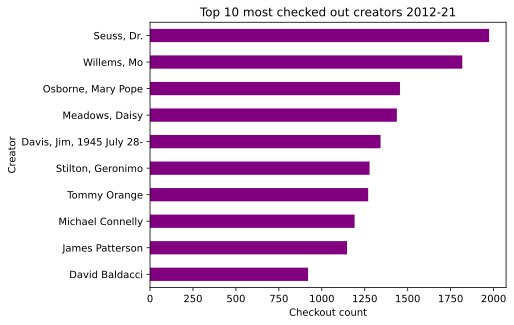

In [44]:
# Plot top 10 most checked out creators
top10creators = (
    checkout_df
    .groupby('creator')['checkouts']
    .sum()
    .sort_values(ascending=False)[:10]
    .sort_values()
    )

ax = top10creators.plot(kind='barh', color='purple')
plt.xlabel('Checkout count')
plt.ylabel('Creator')
plt.title('Top 10 most checked out creators 2012-21')

plt.show()

#### Yearly checkouts for overall top 5 `creators`

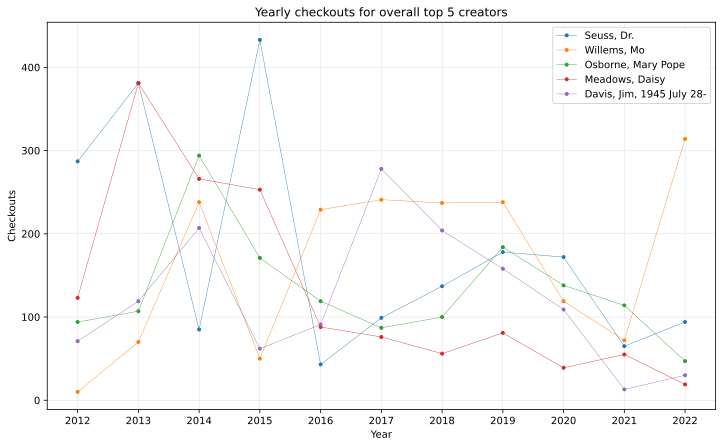

In [45]:
# Get top 5 creator labels
top5_creators = (
    checkout_df
    .groupby('creator')['checkouts']
    .sum()
    .sort_values(ascending=False)[:5]
    .index
    )

# Increase plot size for better display
plt.figure(figsize=(12, 7))
plt.grid(True, which='both', linestyle='-', linewidth=0.2)

# Plot data
for creator in top5_creators:
    creator_data = (
        checkout_df[checkout_df['creator'] == creator]
        .groupby('checkoutyear')['checkouts']
        .sum()
        )
    plt.plot(creator_data, label=creator, marker='.', linewidth='0.4')

# Plot labels, legend, title
plt.xlabel('Year')
plt.ylabel('Checkouts')
plt.title('Yearly checkouts for overall top 5 creators')
plt.xticks(creator_data.index)
plt.legend()

plt.show()

We know the checkout distribution for the overall top 5 creators. But how many **unqiue** `titles` are available for checkout for each of these creators?

In [46]:
top5_creators_list = list(checkout_df.groupby('creator')['checkouts'].sum().sort_values(ascending=False)[:5].index)

for creator in top5_creators_list:
    print(f"Unique Titles for {creator}: {len(checkout_df[checkout_df['creator'] == creator].groupby('title'))}")

Unique Titles for Seuss, Dr.: 70
Unique Titles for Willems, Mo: 38
Unique Titles for Osborne, Mary Pope: 87
Unique Titles for Meadows, Daisy: 91
Unique Titles for Davis, Jim, 1945 July 28-: 49


And what `materialtypes` are available for those titles?

In [47]:
for creator in top5_creators_list:
    temp_df = (
        pd.DataFrame(
            checkout_df[checkout_df['creator'] == creator]
            .groupby('title')['materialtype']
            .value_counts()
            ).reset_index()
        )
    print(f"Available materialtypes for {creator}:")
    print(temp_df['materialtype'].value_counts()) 
    print()

Available materialtypes for Seuss, Dr.:
materialtype
BOOK         64
SOUNDDISC     7
Name: count, dtype: int64

Available materialtypes for Willems, Mo:
materialtype
BOOK    38
Name: count, dtype: int64

Available materialtypes for Osborne, Mary Pope:
materialtype
BOOK         73
SOUNDDISC    14
Name: count, dtype: int64

Available materialtypes for Meadows, Daisy:
materialtype
BOOK        90
REGPRINT     1
Name: count, dtype: int64

Available materialtypes for Davis, Jim, 1945 July 28-:
materialtype
BOOK        48
REGPRINT     1
Name: count, dtype: int64



#### Yearly checkouts per `usageclass` type

In [48]:
checkout_df.groupby('checkoutyear')['usageclass'].value_counts()

checkoutyear  usageclass
2012          Physical      16278
              Digital        3722
2013          Physical      15796
              Digital        4204
2014          Physical      14696
              Digital        5304
2015          Physical      13284
              Digital        6716
2016          Physical      12846
              Digital        7154
2017          Physical      12634
              Digital        7366
2018          Physical      12004
              Digital        7996
2019          Physical      12824
              Digital        7176
2020          Physical      11205
              Digital        8795
2021          Digital       10544
              Physical       9456
2022          Physical      10596
              Digital        9404
Name: count, dtype: int64

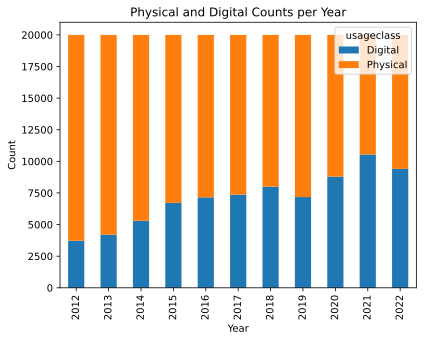

In [49]:
plot_data = checkout_df.groupby('checkoutyear')['usageclass'].value_counts().unstack()

ax = plot_data.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Physical and Digital Counts per Year')

plt.show()

#### Comparison between yearly checkouts of `usageclass` type in 2012 and 2021

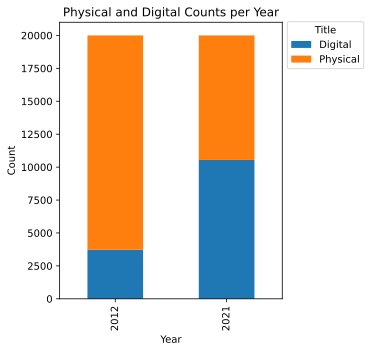

In [50]:
plot_data = (
    checkout_df
    .query('checkoutyear.isin([2012, 2021])')
    .groupby('checkoutyear')['usageclass']
    .value_counts()
    .unstack()
    )

ax = plot_data.plot(kind='bar', stacked=True, figsize=(4, 5))

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Physical and Digital Counts per Year')
plt.legend(title='Title', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

#### Top 10 `publishers` across all years

In [51]:
# Top 10 publishers and count of titles across all years
checkout_df['publisher'].value_counts()[:10]

publisher
Random House, Inc.               10469
Penguin Group (USA), Inc.         7928
HarperCollins Publishers Inc.     7530
Books on Tape                     4686
Blackstone Audio, Inc.            4002
Macmillan Publishers              3165
Hachette Digital, Inc.            2975
Simon & Schuster, Inc.            2751
Tantor Media, Inc                 1618
Random House,                     1439
Name: count, dtype: int64

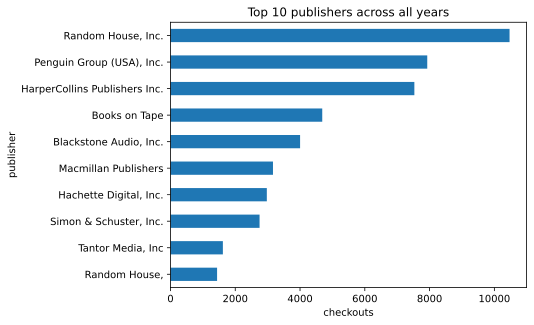

In [52]:
# Plot top 10 publishers
(
    checkout_df['publisher']
    .value_counts()[:10]
    .sort_values(ascending=True)
    .plot(
        kind='barh',
        xlabel='checkouts',
        title='Top 10 publishers across all years'
        )
);

In [53]:
# Bottom 10 publishers and count of titles across all years
checkout_df['publisher'].value_counts().sort_values(ascending=True)[:10]

publisher
Transflux Films,                                                     1
Price World Publishing, LLC                                          1
Vook, Inc.                                                           1
Westview,                                                            1
Lantern Books, a Division of Booklight, Inc.,                        1
DreamWorks Pictures ; Paramount Home Entertainment [distributor],    1
TNT Originals : Distributed by Warner Home Video,                    1
Kind Records,                                                        1
NorthSouth Books Inc.,                                               1
Touchstone Home Entertainment                                        1
Name: count, dtype: int64

# **Checkout Data Analysis 2021**

## About the dataset

- Get library checkout data for the **whole year of 2021**
- Limit data entries per month to **50,000**
- Concat each year to a `pd.DataFrame`
- Save the complete DataFrame as `csv`

In [3]:
# Filename to store data
csv_filename = '2021_seattle_lib_checkouts.csv'

In [55]:
load_data(start_year=2021, end_year=2021, start_month=1, end_month=12,
          limit=50000, filename=csv_filename)

Loading csv data for 1/2021 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2021&checkoutmonth=1&$limit=50000
Loading csv data for 2/2021 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2021&checkoutmonth=2&$limit=50000
Loading csv data for 3/2021 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2021&checkoutmonth=3&$limit=50000
Loading csv data for 4/2021 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2021&checkoutmonth=4&$limit=50000
Loading csv data for 5/2021 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2021&checkoutmonth=5&$limit=50000
Loading csv data for 6/2021 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2021&checkoutmonth=6&$limit=50000
Loading csv data for 7/2021 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2021&checkoutmonth=7&$limit=50000
Loading csv data for 8/2021 from: https://data.s

## Data Cleaning

In [4]:
# Read csv
checkouts2021_df = pd.read_csv(Path(csv_filename))

In [5]:
checkouts2021_df.head()

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,isbn,creator,subjects,publisher,publicationyear
0,Digital,OverDrive,EBOOK,2021,1,1,California: A History,NaN,Kevin Starr,"History, Nonfiction, Reference","Random House, Inc.",2010
1,Digital,OverDrive,EBOOK,2021,1,2,Agnes Grey,NaN,Anne Brontë,"Classic Literature, Fiction",Duke Classics,2020
2,Digital,OverDrive,EBOOK,2021,1,12,Tailspin,NaN,Sandra Brown,"Fiction, Romance, Suspense, Thriller","Hachette Digital, Inc.",2018
3,Digital,OverDrive,EBOOK,2021,1,1,Unleashed,NaN,Laurien Berenson,"Fiction, Mystery",Lightning Source Inc,2016
4,Physical,Horizon,BOOK,2021,1,1,The stoic / Theodore Dreiser.,NaN,"Dreiser, Theodore, 1871-1945",NaN,"World Pub. Co.,",[1947]


In [6]:
# Check if every month is present and evenly distributed
checkouts2021_df['checkoutmonth'].value_counts()

checkoutmonth
1     50000
2     50000
3     50000
4     50000
5     50000
6     50000
7     50000
8     50000
9     50000
10    50000
11    50000
12    50000
Name: count, dtype: int64

In [7]:
checkouts2021_df.shape

(600000, 12)

### Improve memory usage

In [11]:
checkouts2021_df = improve_memory_usage(checkouts2021_df)
del checkouts2021_df['isbn']

In [12]:
checkouts2021_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   usageclass       600000 non-null  category
 1   checkouttype     600000 non-null  category
 2   materialtype     600000 non-null  object  
 3   checkoutyear     600000 non-null  int16   
 4   checkoutmonth    600000 non-null  int8    
 5   checkouts        600000 non-null  int16   
 6   title            600000 non-null  object  
 7   creator          546040 non-null  object  
 8   subjects         597013 non-null  object  
 9   publisher        598948 non-null  object  
 10  publicationyear  598805 non-null  object  
dtypes: category(2), int16(2), int8(1), object(6)
memory usage: 31.5+ MB


## **Analysis**

#### Frequency distribution by `materialtype` (books, ebooks, audiobooks etc.)

In [13]:
material_types_2021 = (
    checkouts2021_df['materialtype']
    .str.split(', ')
    .explode()
    .value_counts()[:10]
    )
material_types_2021

materialtype
BOOK          224332
EBOOK         205127
AUDIOBOOK      96747
VIDEODISC      40811
SOUNDDISC      30054
REGPRINT        1379
MUSIC            772
VIDEO            297
LARGEPRINT       245
ER               235
Name: count, dtype: int64

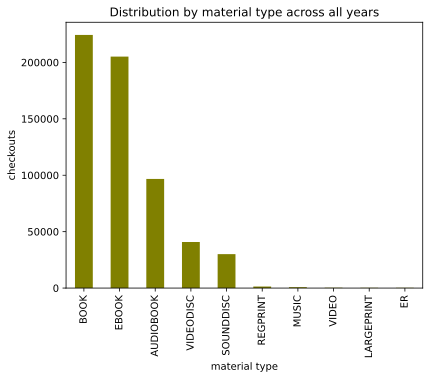

In [14]:
# Plot top 10 materialtypes
material_types_2021.plot.bar(color='olive', 
                            xlabel='material type', 
                            ylabel='checkouts',
                            title='Distribution by material type across all years');

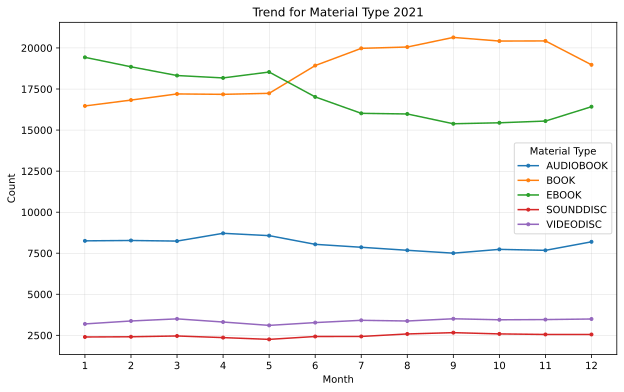

In [15]:
material_types_top5 = list(material_types_2021[:5].index)

mtypes_df = checkouts2021_df[checkouts2021_df['materialtype'].isin(material_types_top5)]
mtypes_plot_data = (
    mtypes_df
    .groupby('checkoutmonth')['materialtype']
    .value_counts()
    .unstack()
    )

# Increase plot size for better display
plt.figure(figsize=(10, 6))
plt.grid(True, which='both', linestyle='-', linewidth=0.2)

plt.plot(mtypes_plot_data, marker='.', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(mtypes_plot_data.index)
plt.title('Trend for Material Type 2021')
plt.legend(title='Material Type', labels=mtypes_plot_data.columns)

plt.show()

#### Top 10 `titles` with most checkouts in 2021

In [16]:
(   
    checkouts2021_df
    .groupby(['materialtype', 'creator', 'title'])['checkouts']
    .sum()
    .sort_values(ascending=False)[:10] 
)

materialtype  creator               title                                                                                
EBOOK         Barack Obama          A Promised Land                                                                          2422
AUDIOBOOK     Brit Bennett          The Vanishing Half: A Novel (unabridged)                                                 1629
EBOOK         Kristin Hannah        The Four Winds: A Novel                                                                  1548
              Matt Haig             The Midnight Library: A Novel                                                            1505
              Jessica Bruder        Nomadland: Surviving America in the Twenty-First Century                                 1459
AUDIOBOOK     Malcolm Gladwell      Talking to Strangers: What We Should Know about the People We Don't Know (unabridged)    1435
EBOOK         Brit Bennett          The Vanishing Half: A Novel                                   

#### Top 10 `Books` in 2021

In [17]:
(
    checkouts2021_df
    .query('materialtype == "BOOK"')
    .groupby(['materialtype', 'creator', 'title'])['checkouts']
    .sum()
    .sort_values(ascending=False)[:10]
)

materialtype  creator                        title                                                                                                                                 
BOOK          Gupta, Sanjay, 1969-           Keep sharp : build a better brain at any age / Sanjay Gupta with Kristin Loberg.                                                          1318
              McLain, Paula                  When the stars go dark : a novel / Paula McLain.                                                                                          1136
              Gates, Bill, 1955-             How to avoid a climate disaster : the solutions we have and the breakthroughs we need / Bill Gates.                                       1044
              Wilkerson, Isabel              Caste : the origins of our discontents / Isabel Wilkerson.                                                                                 914
              Harper, Jane (Jane Elizabeth)  The survivors / Jane Ha

In [18]:
def plot_top_checkouts_per_month(df, material_type='BOOK', top_n=5, plot_line=False):
    """
    Creates a scatter plot for checkouts per month for a chosen `material_type` 
    of the provided DataFrame `df`. The parameter `top_n` defines the number of 
    top materialtypes that will be plotted, e.g. `top_n=5` plots the 5 most common
    `material_types` of the DataFrame `df`.

    Parameters:

    - `df`: DataFrame
    - `material_type`: Entry in `materialtype` column of DataFrame `df`
    - `top_n`: Integer for top n most common `materialtypes` that should be plotted
    - `plot_line`: Connect scatter dots with a line (`True` or `False`)
    """    
    top5_data = list((
        df
        .query('materialtype == @material_type')
        .groupby('title')['checkouts']
        .sum()
        .sort_values(ascending=False)[:top_n]
        .index
        ))

    top5_plot_data = (
        df
        .query('title.isin(@top5_data)')[['title', 'checkoutmonth', 'checkouts']]
        )

    # Increase plot size for better display
    plt.figure(figsize=(8, 5))
    plt.grid(True, which='both', linestyle='-', linewidth=0.2)

    # Plot data
    for title, group in top5_plot_data.groupby('title'):
        plt.scatter(group['checkoutmonth'], group['checkouts'], label=f"{title[:40]}...", alpha=0.7, s=60)
        if plot_line == True:
            plt.plot(group['checkoutmonth'], group['checkouts'], alpha=0.1)

    # Add labels, title and xticks.
    plt.xlabel('Month')
    plt.ylabel('Checkouts')
    plt.title(f'Checkouts per month for top {top_n} {material_type} titles')
    plt.xticks([i for i in range(1, 13)])
    plt.legend(title='Title', bbox_to_anchor=(1, 1.02), loc='upper left')

    plt.show()

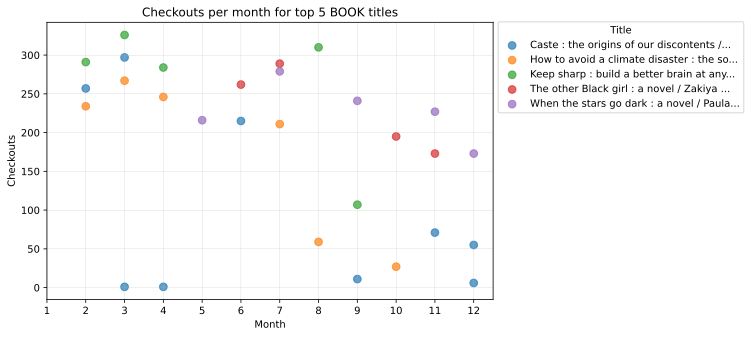

In [19]:
# Plot checkouts per month for top 5 BOOK titles in 2021
plot_top_checkouts_per_month(checkouts2021_df, material_type='BOOK', top_n=5)

#### Top 10 `Ebooks` in 2021

In [20]:
(
    checkouts2021_df
    .query('materialtype == "EBOOK"')
    .groupby(['materialtype', 'creator', 'title'])['checkouts']
    .sum()
    .sort_values(ascending=False)[:10]
)

materialtype  creator          title                                                   
EBOOK         Barack Obama     A Promised Land                                             2422
              Kristin Hannah   The Four Winds: A Novel                                     1548
              Matt Haig        The Midnight Library: A Novel                               1505
              Jessica Bruder   Nomadland: Surviving America in the Twenty-First Century    1459
              Brit Bennett     The Vanishing Half: A Novel                                 1384
              Madeline Miller  Circe                                                       1328
              Jojo Moyes       The Giver of Stars: A Novel                                 1101
              Celeste Ng       Little Fires Everywhere: A Novel                            1059
              Lucy Foley       The Guest List: A Novel                                      992
              Jeanine Cummins  American Dirt: A 

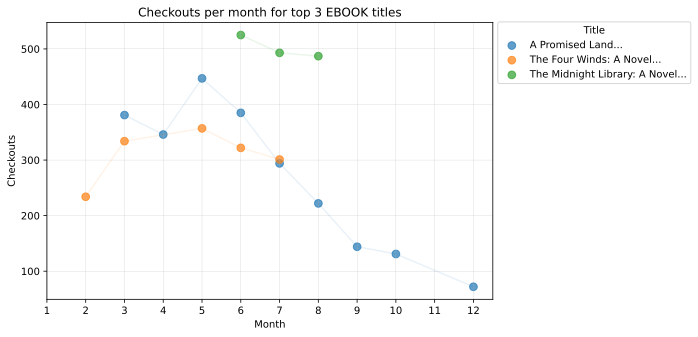

In [21]:
# Plot checkouts per month for top 3 EBOOK titles in 2021
plot_top_checkouts_per_month(checkouts2021_df, material_type='EBOOK', top_n=3, plot_line=True)

#### Top 10 `Audiobooks` in 2021

In [22]:
(
    checkouts2021_df
    .query('materialtype == "AUDIOBOOK"')
    .groupby(['materialtype', 'creator', 'title'])['checkouts']
    .sum()
    .sort_values(ascending=False)[:10]
)

materialtype  creator              title                                                                                                             
AUDIOBOOK     Brit Bennett         The Vanishing Half: A Novel (unabridged)                                                                              1629
              Malcolm Gladwell     Talking to Strangers: What We Should Know about the People We Don't Know (unabridged)                                 1435
              Lucy Foley           The Guest List: A Novel (unabridged)                                                                                  1162
              Robin Wall Kimmerer  Braiding Sweetgrass: Indigenous Wisdom, Scientific Knowledge and the Teachings of Plants (unabridged) (Unabridged)    1036
              Barack Obama         A Promised Land (Unabridged)                                                                                           820
              Mark Manson          The Subtle Art of Not Giv

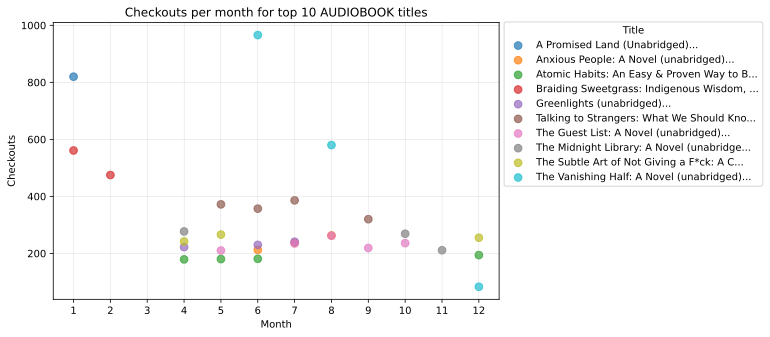

In [23]:
# Plot checkouts per month for top 10 AUDIOBOOK titles in 2021
plot_top_checkouts_per_month(checkouts2021_df, material_type='AUDIOBOOK', top_n=10)

#### Top 10 `subjects` in 2021

In [24]:
subjects2021 = checkouts2021_df['subjects'].str.split(', ').explode().value_counts()[:10]
subjects2021

subjects
Fiction                                      142508
Nonfiction                                    91879
Literature                                    50141
Juvenile Fiction                              44553
Romance                                       41061
Mystery                                       40586
Fantasy                                       34590
Thriller                                      30324
Historical Fiction                            29790
Video recordings for the hearing impaired     29311
Name: count, dtype: int64

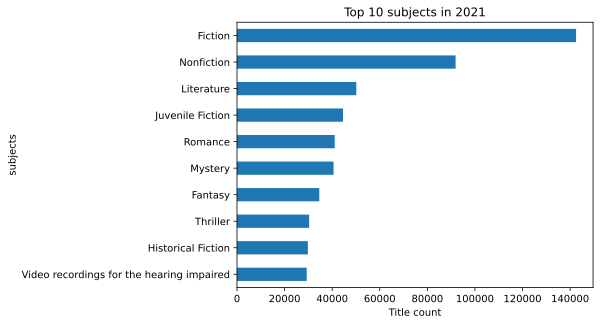

In [25]:
# Plot 
subjects2021.sort_values(ascending=True).plot(
    kind='barh',
    xlabel='Title count',
    ylabel='subjects',
    title='Top 10 subjects in 2021'
    );

#### Overall top 10 most checked out `creators` in 2021

In [26]:
checkouts2021_df.groupby('creator')['checkouts'].sum().sort_values(ascending=False)[:10]

creator
Willems, Mo         6242
Julia Quinn         5490
James Patterson     4948
Agatha Christie     4679
Stephen King        4368
Jeff Kinney         4013
Barack Obama        3975
Brit Bennett        3843
Louise Penny        3834
Michael Connelly    3779
Name: checkouts, dtype: int16

#### Checkout trend for Top 5 `creators` in 2021

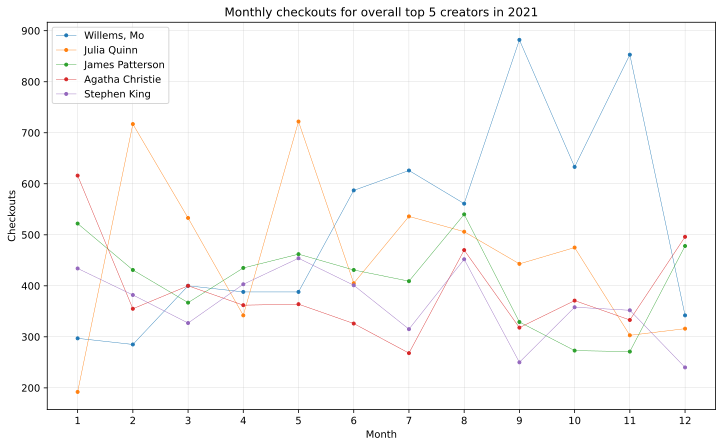

In [28]:
# Get top 5 creator labels
top5_creators_2021 = list(checkouts2021_df.groupby('creator')['checkouts'].sum().sort_values(ascending=False)[:5].index)

# Increase plot size for better display
plt.figure(figsize=(12, 7))
plt.grid(True, which='both', linestyle='-', linewidth=0.2)

# Plot data
for creator in top5_creators_2021:
    creator_2021_data = (
        checkouts2021_df[checkouts2021_df['creator'] == creator]
        .groupby('checkoutmonth')['checkouts']
        .sum()
        )
    plt.plot(creator_2021_data, label=creator, marker='.', linewidth='0.4')

# Plot labels, legend, title
plt.xlabel('Month')
plt.ylabel('Checkouts')
plt.xticks(creator_2021_data.index)
plt.title('Monthly checkouts for overall top 5 creators in 2021')
plt.legend()

plt.show()

#### Checkouts stats per `checkoutyear`

In [56]:
# Clean publicationyear column, i.e. remove everything that is not a digit
checkouts2021_df['publicationyear'] = checkouts2021_df['publicationyear'].str.replace('[^\d]', '',regex=True)
# Clean concatenated years (e.g. '188719231996') for the first year of publication ('1887')
checkouts2021_df['publicationyear'] = checkouts2021_df['publicationyear'].str.replace('(\d{4})(\d*)', r'\1',regex=True)

In [64]:
# Top 10 for whole year of 2021
pubyear_2021 = checkouts2021_df.query('publicationyear < "2021"')['publicationyear'].value_counts()
pubyear_2021[:10]

publicationyear
2020    71078
2019    53980
2017    48360
2018    48042
2013    40675
2016    38776
2015    38123
2014    36728
2011    31023
2012    28032
Name: count, dtype: int64

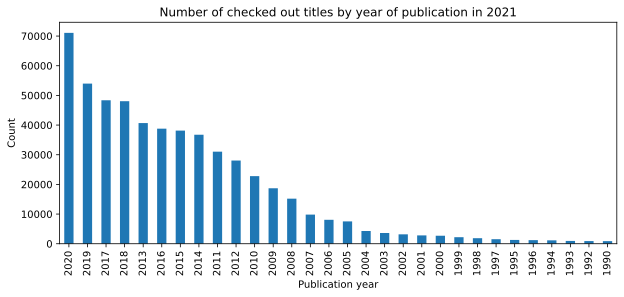

In [123]:
# Plot top 30
pubyear_2021[:30].plot(kind='bar',
                       figsize=(10, 4),
                       xlabel='Publication year',
                       ylabel='Count',
                       title='Number of checked out titles by year of publication in 2021');

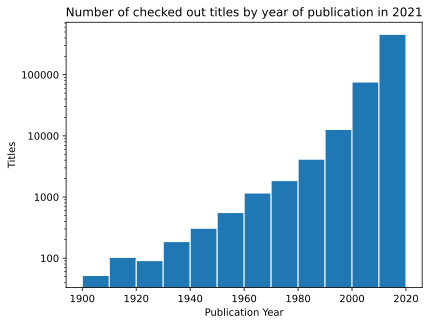

In [182]:
pubyear_2021_df = pd.DataFrame(pd.to_numeric(checkouts2021_df['publicationyear'], errors='coerce'))
pubyear_2021_bins = [i for i in range(1900, 2030, 10)]

# Increase plot size for better display
plt.hist(pubyear_2021_df['publicationyear'], bins=pubyear_2021_bins, log=True, edgecolor='white')
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.xlabel('Publication Year')
plt.ylabel('Titles')
plt.title('Number of checked out titles by year of publication in 2021')
plt.show()

#### Monthly checkouts per `usageclass` type

In [29]:
checkouts2021_df.groupby('checkoutmonth')['usageclass'].value_counts()

checkoutmonth  usageclass
1              Digital       27720
               Physical      22280
2              Digital       27152
               Physical      22848
3              Digital       26594
               Physical      23406
4              Digital       26909
               Physical      23091
5              Digital       27130
               Physical      22870
6              Digital       25089
               Physical      24911
7              Physical      26094
               Digital       23906
8              Physical      26318
               Digital       23682
9              Physical      27092
               Digital       22908
10             Physical      26805
               Digital       23195
11             Physical      26749
               Digital       23251
12             Physical      25365
               Digital       24635
Name: count, dtype: int64

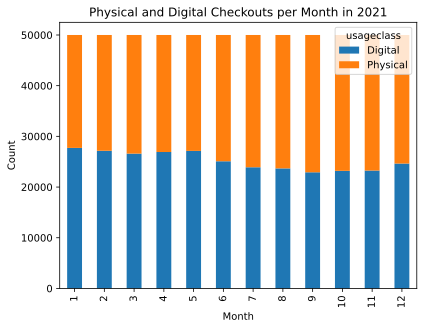

In [30]:
plot_data = (
    checkouts2021_df
    .groupby('checkoutmonth')['usageclass']
    .value_counts()
    .unstack()
    )

ax = plot_data.plot(kind='bar', stacked=True)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Physical and Digital Checkouts per Month in 2021')

plt.show()

### Save DF as **pickle**

Use pickled DF for *SeattleLib_KnowledgeGraph.ipynb*

In [187]:
checkouts2021_df.to_pickle('checkouts2021.pkl')